In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 #data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uae-real-estate-2024-dataset/uae_real_estate_2024.csv


<h1 style="background: linear-gradient(to right, #4682B4, #D3D3D3); 
    color: lightgrey;
    background-color :navy ;
    padding: 10px 20px;
    border-radius: 10px; 
    font-weight: bold;
    font-size: 24px;
    box-shadow: 0 0 5px rgba(0, 2, 0.6, 0.2);">
     1  | Importing Necessary Libraries
</h1>


In [2]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import re


import string
from nltk.util import ngrams
import statsmodels.api as sm

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

<h1 style=" color: lightgrey;
    background-color :navy ;
    padding: 10px 20px;
    border-radius: 10px; 
    font-weight: bold;
    font-size: 24px;
    ">
     2 |  Importing and understanding the data </h1>


In [3]:
data = pd.read_csv('/kaggle/input/uae-real-estate-2024-dataset/uae_real_estate_2024.csv')
df =  pd.DataFrame(data)


In [4]:
df.shape

(5058, 12)

In [5]:
df.columns

Index(['title', 'displayAddress', 'bathrooms', 'bedrooms', 'addedOn', 'type',
       'price', 'verified', 'priceDuration', 'sizeMin', 'furnishing',
       'description'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5058 entries, 0 to 5057
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           5058 non-null   object
 1   displayAddress  5058 non-null   object
 2   bathrooms       4938 non-null   object
 3   bedrooms        4935 non-null   object
 4   addedOn         5058 non-null   object
 5   type            5058 non-null   object
 6   price           5058 non-null   int64 
 7   verified        5058 non-null   bool  
 8   priceDuration   5058 non-null   object
 9   sizeMin         5058 non-null   object
 10  furnishing      5056 non-null   object
 11  description     5057 non-null   object
dtypes: bool(1), int64(1), object(10)
memory usage: 439.7+ KB


In [7]:
df['AreaSqft'] = (df['sizeMin'].replace(' sqft', '', regex=True).astype(int))
df = df.drop(columns = ['sizeMin'])
df[['price','AreaSqft']].describe()

,price,AreaSqft
count,5.058000e+03,5058.000000
mean,5.050924e+06,2549.670621
std,1.000928e+07,3746.860842
min,1.000000e+05,82.000000
25%,1.200000e+06,802.000000
50%,2.350000e+06,1419.000000
75%,4.499375e+06,2799.750000
max,1.990000e+08,100000.000000


In [8]:
df.head(5)

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,furnishing,description,AreaSqft
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,NO,MNA Properties is delighted to offer this apar...,1323
1,Full Sea View | Beach Life | Brand New Residence,"La Vie, Jumeirah Beach Residence, Dubai",3,2,2024-08-13T05:45:16Z,Residential for Sale,7200000,True,sell,YES,"Apartment for sale in La Vie, Jumeirah Beach R...",1410
2,Green Belt | Corner Unit | Spacious Plot,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,NO,Treo Homes is very pleased to be bringing to t...,2324
3,2BR+Study | Near Pool and Park | Private,"Springs 15, The Springs, Dubai",3,2,2024-08-15T06:07:22Z,Residential for Sale,2999999,True,sell,NO,2 Bedrooms + Study | Near Pool &amp; Park | Pr...,1647
4,Vacant | Well Maintained | Area Expert,"Noor Townhouses, Town Square, Dubai",3,3,2024-08-09T08:28:59Z,Residential for Sale,2449999,True,sell,NO,-Type 1\n-3 Bed+Maid\n-Close To Amenities\n-BU...,2105


In [9]:
df.tail(5)

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,furnishing,description,AreaSqft
5053,07 Layout | Handover Q2 2025 | Multiple Units ...,"Sobha Creek Vistas Grande, Sobha Hartland, Moh...",3,2,2024-07-10T14:07:57Z,Residential for Sale,2345000,True,sell,PARTLY,Nobel Victory Real Estate are proud to present...,1268
5054,Emaar | Waterfront Apartment | 10% DP | 5-Yr PP,"Al Marjan Island, Ras Al Khaimah",2,1,2024-08-12T13:08:33Z,Residential for Sale,3007888,False,sell,NO,"Discover Address Residence by Emaar, nestled o...",854
5055,Upgraded | Spacious With Private Garden,"Oia Residence, Motor City, Dubai",5,4,2024-04-20T08:43:16Z,Residential for Sale,4000000,True,sell,NO,Rocky Real Estate presents an Exclusive and up...,3813
5056,"10 Series | Full Sea, Burj Khalifa View Exclusive","The Grand, Dubai Creek Harbour (The Lagoons), ...",2,2,2024-07-08T07:05:56Z,Residential for Sale,3800000,True,sell,NO,Dingstone Real Estate is pleased to present to...,1300
5057,Family Home | Unique Design | Attracrive Price,"Avena, The Valley, Dubai",5,4,2024-07-16T06:57:49Z,Residential for Sale,4360000,False,sell,NO,"Introducing Avena, the valley’s newest and mos...",3685


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5058 entries, 0 to 5057
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           5058 non-null   object
 1   displayAddress  5058 non-null   object
 2   bathrooms       4938 non-null   object
 3   bedrooms        4935 non-null   object
 4   addedOn         5058 non-null   object
 5   type            5058 non-null   object
 6   price           5058 non-null   int64 
 7   verified        5058 non-null   bool  
 8   priceDuration   5058 non-null   object
 9   furnishing      5056 non-null   object
 10  description     5057 non-null   object
 11  AreaSqft        5058 non-null   int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 439.7+ KB


<h1 style="background: linear-gradient(to right, #4682B4, #D3D3D3); 
    color: lightgrey;
    background-color :navy ;
    padding: 10px 20px;
    border-radius: 10px; 
    font-weight: bold;
    box-shadow: 0 0 5px rgba(0, 2, 0.6, 0.2);
    font-size: 24px;">
    <strong> 3 |  EDA and more understanding  </strong>
</h1>


In [11]:
for f in df[[ 'bathrooms', 'bedrooms', 'type',
       'verified', 'furnishing','priceDuration' ]] :
    print(len(df[f].unique()))


10
10
1
2
4
1


In [12]:
df['verified'].unique() , df['type'].unique()
# since the two values are usless tehy will be dropped

(array([ True, False]), array(['Residential for Sale'], dtype=object))

In [13]:
df = df.drop(columns=['verified', 'type','description','priceDuration'])

<h1 style="background: linear-gradient(to right, #4682B4, #D3D3D3); 
    color:navy ;
    background-color :lightgrey ;
    padding: 10px 20px;
    border-radius: 10px; 
    font-weight: bold;
    box-shadow: 0 0 5px rgba(0, 2, 0.6, 0.2);
    font-size: 20px;">
    <strong> 3.1 | Dealing with data problems (Cleanining, Procesing, Normalization)  </strong>
</h1>


In [14]:
# Notice the "none", "nan", "7+"
df['bedrooms'].unique()

array(['2', '4', '3', '5', '1', 'studio', nan, '7', '6', '7+'],
      dtype=object)

In [15]:
df['bedrooms'] = df['bedrooms'].replace('studio', 0)
df['bedrooms'] = df['bedrooms'].replace('7+',7)
df['bedrooms'] = df['bedrooms'].replace('studio', 0)
df['bedrooms'] = df['bedrooms'].astype(float)
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
len(df['bedrooms'].unique())

8

In [16]:
df['bathrooms'].unique()

array(['3', '7', '4', '1', '5', '2', '6', nan, '7+', 'none'], dtype=object)

In [17]:
# Notice the "none", "nan", "7+"
df['bathrooms'].unique()

array(['3', '7', '4', '1', '5', '2', '6', nan, '7+', 'none'], dtype=object)

In [18]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bathrooms'] = df['bathrooms'].replace('none', 0)
df['bathrooms'] = df['bathrooms'].replace('7+',7)
df['bathrooms'].unique()

array(['3', '7', '4', '1', '5', '2', '6', 7, 0], dtype=object)

In [19]:
df.columns

Index(['title', 'displayAddress', 'bathrooms', 'bedrooms', 'addedOn', 'price',
       'furnishing', 'AreaSqft'],
      dtype='object')

In [20]:
df['title']

0                     Great ROI I High Floor I Creek View
1        Full Sea View | Beach Life | Brand New Residence
2                Green Belt | Corner Unit | Spacious Plot
3                2BR+Study | Near Pool and Park | Private
4                  Vacant | Well Maintained | Area Expert
                              ...                        
5053    07 Layout | Handover Q2 2025 | Multiple Units ...
5054      Emaar | Waterfront Apartment | 10% DP | 5-Yr PP
5055              Upgraded | Spacious With Private Garden
5056    10 Series | Full Sea, Burj Khalifa View Exclusive
5057       Family Home | Unique Design | Attracrive Price
Name: title, Length: 5058, dtype: object

In [21]:
def cleaning_title(listing):
    cleaned = re.sub(r'[^a-zA-Z\s]', '', listing)
    cleaned = ' '.join(cleaned.split())
    return cleaned 
df['features'] = df['title'].apply(lambda x: pd.Series(cleaning_title(x)))
df = df.drop(columns = ['title'])
df['features']

0                Great ROI I High Floor I Creek View
1       Full Sea View Beach Life Brand New Residence
2               Green Belt Corner Unit Spacious Plot
3                 BRStudy Near Pool and Park Private
4                 Vacant Well Maintained Area Expert
                            ...                     
5053      Layout Handover Q Multiple Units Available
5054             Emaar Waterfront Apartment DP Yr PP
5055           Upgraded Spacious With Private Garden
5056     Series Full Sea Burj Khalifa View Exclusive
5057      Family Home Unique Design Attracrive Price
Name: features, Length: 5058, dtype: object

In [22]:
df['furnishing'].unique()

array(['NO', 'YES', 'PARTLY', nan], dtype=object)

In [23]:
# 1. Area, Address and furnishing
df
df[['building','Street', 'Area', 'City']] = df['displayAddress'].str.split(', ', expand=True)
df['furnishing'] = df['furnishing'].fillna(df['furnishing'].mode()[0])
df['price_per_sqft'] = df['price'] / df['AreaSqft']
average_rate_per_area = df.groupby('Area')['price_per_sqft'].mean().reset_index()
df =  df.merge(average_rate_per_area, on='Area', how='left', suffixes=('', '_avg_per_Area'))
# 2. Convert columns  types
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['features'] = df['features'].astype(str)
df['price'] = df['price'].astype(int)
df['date'] =pd.to_datetime(df['addedOn'])
df[['building','Street', 'Area', 'City']] = df[['building','Street', 'Area', 'City']].astype(str)

# 3. Extracting season feature  
# Define a function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['season'] = df['date'].dt.month.apply(get_season).astype(str)
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
# 3. Drop the original 'displayAddress' column if no longer needed
df = df.drop(columns=['displayAddress','addedOn','building','City','Street'])


# Print the DataFrame to verify changes
df.dtypes
 

bathrooms                                    int64
bedrooms                                     int64
price                                        int64
furnishing                                  object
AreaSqft                                     int64
features                                    object
Area                                        object
price_per_sqft                             float64
price_per_sqft_avg_per_Area                float64
date                           datetime64[ns, UTC]
season                                      object
month                                        int32
day                                          int32
dtype: object

<h1 style="background: linear-gradient(to right, #4682B4, #D3D3D3); 
    color:navy ;
    background-color :lightgrey ;
    padding: 10px 20px;
    border-radius: 10px; 
    font-weight: bold;
    box-shadow: 0 0 5px rgba(0, 2, 0.6, 0.2);
    font-size: 20px;">
    <strong> 3.2 | Visualization For A Better Insight  </strong>
</h1>

In [24]:
df['date'] = df['date'].dt.date
daily_summary = df.groupby('date').agg(
    count=('price', 'size'),
    total_price=('price', 'sum')
).reset_index()
daily_summary = daily_summary[daily_summary['count'] > 2]
daily_summary

,date,count,total_price
19,2023-09-25,3,4450000
52,2024-01-11,3,13750000
55,2024-01-15,3,14495000
58,2024-01-23,6,11039475
60,2024-01-25,5,34930000
...,...,...,...
244,2024-08-15,101,509736569
245,2024-08-16,95,775591260
246,2024-08-17,42,106601561
247,2024-08-18,20,53457115


In [25]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=daily_summary['date'],
    y=daily_summary['total_price'],
    mode='lines',
    name='AVG Price',
    line=dict(color='red'),
    marker=dict(size=8),
    yaxis='y2'  # Associate with the second y-axis
))

# Update layout to include dual y-axes
fig.update_layout(
    title='Average price of unites added on the site  Per Day',
    yaxis2=dict(
        title='AVG Price Per day ',
        titlefont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    xaxis=dict(tickformat='%Y-%m-%d',  title_standoff=100),
    template = 'plotly_white',
   
)

# Show the plot
fig.show()

In [26]:
df_month_count = df['month'].value_counts().reset_index()
df_month_count.columns = ['month', 'count_units']
df_month_count = df_month_count.sort_values(by='count_units', ascending=False)  # Optional: Sort by count


fig = px.bar(
    df_month_count,
    x='month',
    y='count_units',
    title='Distribution of Units Sold by Month',
    labels={'month': 'Month', 'count_units': 'Count of Units Sold'},
    color='count_units',
    color_discrete_sequence=px.colors.qualitative.Plotly  # Use default Plotly colors
)

# Add data labels
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Update layout to improve readability
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Count of Units Sold',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    
)

# Show the plot
fig.show()

In [27]:
df_season_count = df['season'].value_counts().reset_index()
df_season_count.columns = ['season', 'count_units']

# Create the bar chart
fig = px.bar(
    df_season_count,
    x='season',
    y='count_units',
    title='Distribution of Units Sold by Season',
    labels={'season': 'Season', 'count_units': 'Count of Units Sold'},
    color='season',
    color_discrete_sequence=px.colors.qualitative.Plotly  # Use default Plotly colors
)

# Show the plot
fig.show()

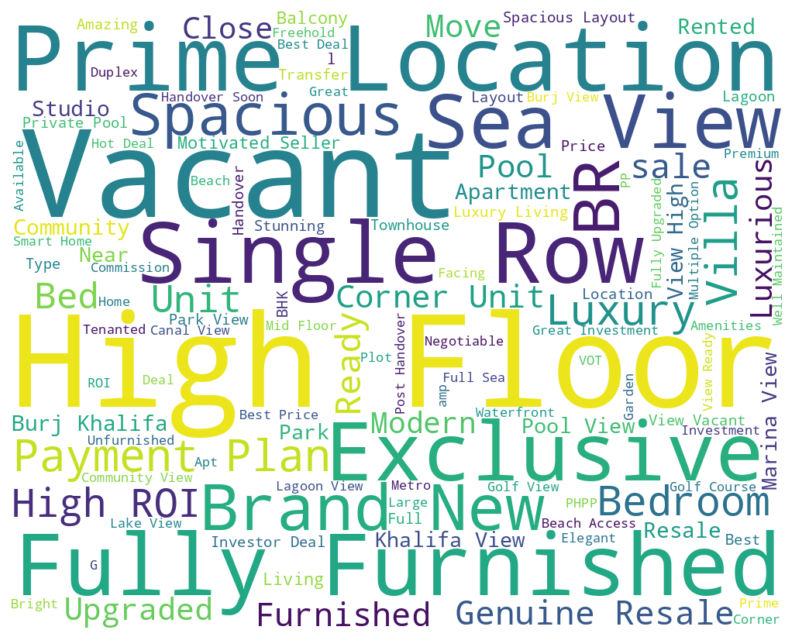

In [28]:
text = ' '.join(df['features'])

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=800, 
                      max_font_size=175, min_font_size=15,
                      background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [29]:
# Function to get the most frequent bigram from combined text
def most_frequent_bigram_from_text(features, Area):
    combined_text = f"{features} {Area}"
    tokens = word_tokenize(combined_text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    bigrams = list(ngrams(tokens, 2))
    bigram_counts = Counter(bigrams)
    most_common = bigram_counts.most_common(1)
    return ' '.join(most_common[0][0]) if most_common else None

df['Most_Frequent_Bigram'] = df.apply(lambda row: most_frequent_bigram_from_text(row['features'], row['Area']), axis=1)

# Drop rows with None values
df = df.dropna(subset=['Most_Frequent_Bigram'])

# Calculate bigram frequency
bigram_counts = df['Most_Frequent_Bigram'].value_counts().reset_index()
bigram_counts.columns = ['Most_Frequent_Bigram', 'Frequency']

# Calculate average price for each bigram
bigram_price_df = df.groupby('Most_Frequent_Bigram')['price'].mean().reset_index()
merged_df = bigram_price_df.merge(bigram_counts, on='Most_Frequent_Bigram')

# Select the top 100 most frequent bigrams
top_100_bigrams = merged_df.nlargest(100, 'Frequency')

In [30]:
# Create the bubble chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=top_100_bigrams['Most_Frequent_Bigram'],
    y=top_100_bigrams['price'],
    mode='markers',
     marker=dict(
        size=top_100_bigrams['Frequency']*1.55,  # Adjust bubble size
        color=top_100_bigrams['price'],         # Color by price
        colorscale='Reds',                    # Use Reds colorscale
        colorbar=dict(
            title='Price',
            tickvals=[top_100_bigrams['price'].min(), top_100_bigrams['price'].max()],
            ticktext=['Low', 'High']
        ),
        opacity=0.6
    ),
    text=top_100_bigrams['Most_Frequent_Bigram'],
    textposition='top center',
    name='Bigrams'
))

fig.update_layout(
    title='Bubble Chart of Average Price by Most Frequent Bigram (Top 100)',
    xaxis_title='Most Frequent Bigram',
    xaxis_tickangle=-45,  # Rotate x-axis labels for readability
    yaxis=dict(
        showticklabels=False,  # Hide y-axis tick labels
        showline=False,       # Hide y-axis line
        zeroline=False,       # Hide zero line
        showgrid=False        # Hide y-axis grid lines
    )
)

fig.show()

In [31]:
fig = px.strip(df, x="AreaSqft", y="price", orientation="h", color="furnishing")
fig.show()

In [32]:
df = df[(df['price'] < 30000000) & (df['AreaSqft'] < 30000)]

In [33]:
f = df[df['furnishing'] == 'YES'].sort_values(by='price')
pf = df[df['furnishing'] == 'PARTLY'].sort_values(by='price')
nf = df[df['furnishing'] == 'NO'].sort_values(by='price')


In [34]:


import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 3 columns
fig = make_subplots(rows=1, cols=3, 
                    subplot_titles=['Furnishing YES', 'Furnishing PARTLY', 'Furnishing NO'])

# Add traces for each furnishing category
fig.add_trace(go.Scatter(x=f['AreaSqft'], y=f['price'], mode='markers', name='Furnished ', marker=dict(color='blue')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=pf['AreaSqft'], y=pf['price'], mode='markers', name='Partly Furnishing', marker=dict(color='orange')),
              row=1, col=2)
fig.add_trace(go.Scatter(x=nf['AreaSqft'], y=nf['price'], mode='markers', name='Not Furnishing', marker=dict(color='red')),
              row=1, col=3)

# Update layout for subplots
fig.update_layout(
    title='Price vs. Area by Furnishing Status',
    xaxis_title='Area',
    yaxis_title='Price',
    template='plotly_dark',
    showlegend=False
)

# Update xaxes and yaxes titles
fig.update_xaxes(title_text='Area', row=1, col=1)
fig.update_xaxes(title_text='Area', row=1, col=2)
fig.update_xaxes(title_text='Area', row=1, col=3)

fig.update_yaxes(title_text='Price', row=1, col=1)
fig.update_yaxes(title_text='Price', row=1, col=2)
fig.update_yaxes(title_text='Price', row=1, col=3)

# Update subplot titles
fig.update_layout(title_text='Price vs. Area by Furnishing Status')

fig.show()

In [35]:

fig = go.Figure()
fig.add_trace(go.Bar(
    x=f['bedrooms'],
    y= f['price'],
    name='Furnished Unit',
   
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x= pf['bedrooms'],
    y= pf['price'],
    name='Partialy Furnished Unit',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x= nf['bedrooms'],
    y= nf['price'],
    name='Not Furnished Unit',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(
                 
                  xaxis_tickangle=-45,
                  title='Comparing Unit distrbution Relative To the Number Of Bedrooms And Type Of Furnishing',
     xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Unites For Sale',
        titlefont_size=16,
        showticklabels=False ,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [36]:

fig = px.scatter(df.sort_values(by='bedrooms'), x="AreaSqft", y="price", color="furnishing", facet_col="bedrooms",   facet_col_wrap=4, size = 'price')
fig.update_layout(  # Wrap facets into multiple rows, 4 per row
    title='Scatter Plot of Space Area vs. Price by Bedrooms and Furnishing',   # Transparent plot background
    
    scattermode="group"
)

fig.show()

In [37]:
fig = px.scatter(df.sort_values(by='bedrooms'), x="AreaSqft", y="price", color="furnishing", facet_col="bedrooms",   facet_col_wrap=4, size = 'price')
fig.update_layout(  # Wrap facets into multiple rows, 4 per row
    title='Scatter Plot of Space Area vs. Price by Bedrooms and Furnishing',   # Transparent plot background
    
    scattermode="group"
)

fig.show()

In [38]:
fig = px.scatter(df.sort_values(by='price_per_sqft_avg_per_Area'), x="Area", y="price_per_sqft_avg_per_Area", color="furnishing" , facet_col="furnishing",   facet_col_wrap=3)
fig.update_layout( 
    title='Scatter Plot of Location Area vs. Price by  Furnishing',
    scattermode="group",  
)

fig.show()

In [39]:
df_counts = df.groupby(['bedrooms', 'bathrooms']).size().reset_index(name='count')
# Create a bar plot
fig = px.bar(
    df_counts,
    x='bedrooms',
    y='bathrooms',
    color='count',
    barmode='group',
    labels={'bedrooms': 'Number of Bedrooms', 'count': 'Number of Units', 'bathrooms': 'Number of Bathrooms'},
    title='Number of Units by Bedrooms and Bathrooms',
    range_color= [3, 500]
)

# Update layout to style the plot
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper background
   
    xaxis=dict(
        title='Number of Bedrooms' ),
    yaxis=dict( title='Number of Units'),
    legend_title='Number of Bathrooms',
     yaxis_title='Number of Units',
    coloraxis=dict(
        colorscale='Viridis',  # Change the color scale if needed
        colorbar=dict(
            tickvals=[3, 20, 50, 100, 150, 250, 350,450,550,650,750,850]))
   
    
)

fig.show()

In [40]:
fig = px.scatter(
    df,
    x='price',
    y='AreaSqft',
    color='bedrooms',
    size='bedrooms',  # Bubble size represents the number of bedrooms
    labels={'spaceArea': 'Space Area', 'price': 'Price', 'bedrooms': 'Number of Bedrooms'},
    title='Price vs Space Area with Bubble Size Representing Number of Bedrooms'
)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis_title='Price',
    yaxis_title=' Space Area',
    legend_title='Number of Bedrooms'
)

fig.show()

In [41]:

fig = px.scatter(
    df,
    x='price',
    y='AreaSqft',
    color='bathrooms',
    size='bathrooms',  # Bubble size represents the number of bedrooms
    labels={'spaceArea': 'Space Area', 'price': 'Price', 'bathrooms': 'Number of bathrooms'},
    title='Price vs Space Area with Bubble Size Representing Number of bathrooms'
)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis_title='Price',
    yaxis_title=' Space Area',
    legend_title='Number of bathrooms'
)

fig.show()

In [42]:
df_avg_price = df.groupby('bedrooms', as_index=False)[['AreaSqft','price']].mean()

fig = go.Figure()

# Add a line for average price
fig.add_trace(go.Scatter(
    x=df_avg_price['bedrooms'],
    y=df_avg_price['price'],
    mode='lines+markers',
    name='Average Price',
    line=dict(color='blue')
))

# Add a line for average space area
fig.add_trace(go.Scatter(
    x=df_avg_price['bedrooms'],
    y=df_avg_price['AreaSqft'],
    mode='lines+markers',
    name='Average Space Area',
    line=dict(color='red')
))

# Update layout with logarithmic y-axis
fig.update_layout(
    title='Average Price and Space Area by Number of Bedrooms',
    xaxis_title='Number of Bedrooms',
    yaxis_title='Value',
    yaxis=dict(
        type='log',  # Activate logarithmic scale for y-axis
        title='Log Scale Value'
    ),
    legend_title='Metrics',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        orientation='v'
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgba(0,0,0,0)'  # Transparent paper background
)

fig.show()

<h1 style="background: linear-gradient(to right, #4682B4, #D3D3D3); 
    color: lightgrey;
    background-color :navy ;
    padding: 10px 20px;
    border-radius: 10px; 
    font-weight: bold;
    box-shadow: 0 0 5px rgba(0, 2, 0.6, 0.2);
    font-size: 24px;">
    <strong> 4 | Factors Affecting Price and Future Price Prediction  </strong>
</h1>


In [43]:
df.columns

Index(['bathrooms', 'bedrooms', 'price', 'furnishing', 'AreaSqft', 'features',
       'Area', 'price_per_sqft', 'price_per_sqft_avg_per_Area', 'date',
       'season', 'month', 'day', 'Most_Frequent_Bigram'],
      dtype='object')

In [44]:
furnishing_mapping = {'NO': 0, 'YES': 1, 'PARTLY': 2}

# Map the 'furnishing' column
df['furnishing_encoded'] = df['furnishing'].map(furnishing_mapping)


season_mapping = {'Summer': 0, 'Winter': 1, 'Spring': 2, 'Fall' : 3}

# Map the 'furnishing' column
df['Season'] = df['season'].map(season_mapping)

# Drop the original 'furnishing' column if no longer needed
df = df.drop(columns=['furnishing','season','Area','Most_Frequent_Bigram'])

In [45]:
# Extract month and day
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Cyclic encoding for month
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Cyclic encoding for day
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)  # Assume maximum day is 31
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

# Drop the original 'month' and 'day' columns if no longer needed
df = df.drop(columns=['month', 'day','date'])


In [46]:
df = df.bfill()
df

,bathrooms,bedrooms,price,AreaSqft,features,price_per_sqft,price_per_sqft_avg_per_Area,furnishing_encoded,Season,month_sin,month_cos,day_sin,day_cos
0,3,2,2500000,1323,Great ROI I High Floor I Creek View,1889.644747,1907.620647,0,0,-0.866025,-0.500000,0.299363,-0.954139
1,3,2,7200000,1410,Full Sea View Beach Life Brand New Residence,5106.382979,1907.620647,1,0,-0.866025,-0.500000,0.485302,-0.874347
2,3,4,3600000,2324,Green Belt Corner Unit Spacious Plot,1549.053356,1096.408105,0,0,-0.866025,-0.500000,0.299363,-0.954139
3,3,2,2999999,1647,BRStudy Near Pool and Park Private,1821.493018,1907.620647,0,0,-0.866025,-0.500000,0.101168,-0.994869
4,3,3,2449999,2105,Vacant Well Maintained Area Expert,1163.895012,1907.620647,0,0,-0.866025,-0.500000,0.968077,-0.250653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,3,2,2345000,1268,Layout Handover Q Multiple Units Available,1849.369085,2276.296236,2,0,-0.500000,-0.866025,0.897805,-0.440394
5054,2,1,3007888,854,Emaar Waterfront Apartment DP Yr PP,3522.117096,1907.620647,0,0,-0.866025,-0.500000,0.651372,-0.758758
5055,5,4,4000000,3813,Upgraded Spacious With Private Garden,1049.042748,1907.620647,0,2,0.866025,-0.500000,-0.790776,-0.612106
5056,2,2,3800000,1300,Series Full Sea Burj Khalifa View Exclusive,2923.076923,1907.620647,0,0,-0.500000,-0.866025,0.998717,-0.050649


In [47]:
X = df[['bedrooms', 'bathrooms', 'AreaSqft','price_per_sqft','furnishing_encoded','Season',	"month_sin",'month_cos','day_sin','day_cos','price_per_sqft_avg_per_Area']]
y = df['price']

# Add constant term to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1438.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:05:20   Log-Likelihood:                -78129.
No. Observations:                4902   AIC:                         1.563e+05
Df Residuals:                    4890   BIC:                         1.564e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [48]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 234487878639.27295
R^2 Score: 0.9867954271886199


In [49]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [50]:
df['tokenized'] = df['features'].apply(lambda x: word_tokenize(x.lower()))

# Train Word2Vec model
sentences = df['tokenized'].tolist()
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0)

# Create feature vectors for each description
def get_average_embedding(tokens, model):
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    if len(embeddings) == 0:
        return np.zeros(model.vector_size)
    return np.mean(embeddings, axis=0)
embedding_df = pd.DataFrame()
embedding_df['features_embedding'] = df['tokenized'].apply(lambda x: get_average_embedding(x, word2vec_model))
embedding_df = embedding_df['features_embedding'].apply(pd.Series)
embedding_df.columns = [f'feature_emb_{i}' for i in range(embedding_df.shape[1])]

In [51]:
df =df.drop(columns = ['tokenized'])
df

,bathrooms,bedrooms,price,AreaSqft,features,price_per_sqft,price_per_sqft_avg_per_Area,furnishing_encoded,Season,month_sin,month_cos,day_sin,day_cos
0,3,2,2500000,1323,Great ROI I High Floor I Creek View,1889.644747,1907.620647,0,0,-0.866025,-0.500000,0.299363,-0.954139
1,3,2,7200000,1410,Full Sea View Beach Life Brand New Residence,5106.382979,1907.620647,1,0,-0.866025,-0.500000,0.485302,-0.874347
2,3,4,3600000,2324,Green Belt Corner Unit Spacious Plot,1549.053356,1096.408105,0,0,-0.866025,-0.500000,0.299363,-0.954139
3,3,2,2999999,1647,BRStudy Near Pool and Park Private,1821.493018,1907.620647,0,0,-0.866025,-0.500000,0.101168,-0.994869
4,3,3,2449999,2105,Vacant Well Maintained Area Expert,1163.895012,1907.620647,0,0,-0.866025,-0.500000,0.968077,-0.250653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,3,2,2345000,1268,Layout Handover Q Multiple Units Available,1849.369085,2276.296236,2,0,-0.500000,-0.866025,0.897805,-0.440394
5054,2,1,3007888,854,Emaar Waterfront Apartment DP Yr PP,3522.117096,1907.620647,0,0,-0.866025,-0.500000,0.651372,-0.758758
5055,5,4,4000000,3813,Upgraded Spacious With Private Garden,1049.042748,1907.620647,0,2,0.866025,-0.500000,-0.790776,-0.612106
5056,2,2,3800000,1300,Series Full Sea Burj Khalifa View Exclusive,2923.076923,1907.620647,0,0,-0.500000,-0.866025,0.998717,-0.050649


In [52]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(embedding_df)

# Apply PCA to reduce to 15 components
pca = PCA(n_components=15)
pca_embeddings = pca.fit_transform(scaled_embeddings)

# Convert PCA components to a DataFrame
pca_df = pd.DataFrame(pca_embeddings, columns=[f'pca_component_{i}' for i in range(pca_embeddings.shape[1])])




In [53]:
pca_df

,pca_component_0,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,pca_component_6,pca_component_7,pca_component_8,pca_component_9,pca_component_10,pca_component_11,pca_component_12,pca_component_13,pca_component_14
0,-6.600558,3.961242,-0.952096,0.224544,-0.081813,-0.578989,-1.004754,0.544297,0.237899,0.934857,0.858416,-0.530972,-0.286528,0.256521,0.170796
1,-0.857000,0.814112,0.236224,0.436847,0.080246,-1.359408,0.395609,-0.482532,0.977538,-0.080262,0.339880,0.380015,0.166634,-0.554618,-0.220821
2,3.907611,-1.731555,-1.714210,-0.640968,-1.264915,0.011720,0.189578,-0.958848,-0.117339,0.132738,0.120282,-0.031628,0.013072,-0.577729,0.265666
3,-2.625925,-1.680905,0.346503,-0.443910,-0.938627,-0.302904,0.030344,-1.121201,1.228159,0.464842,0.261185,-0.029686,0.451923,1.160804,-0.132870
4,5.845762,-0.371793,0.146719,0.516130,0.764141,0.513544,-0.131663,-0.203458,-0.532440,0.278181,-0.084342,0.277003,-0.084235,-0.805071,0.689764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,-4.295308,-1.212702,-1.672556,0.150278,0.067940,0.021025,1.335382,-0.349462,1.202258,0.113910,-0.609881,-0.229393,0.561272,0.089472,0.824951
4898,3.967793,-1.724223,-0.803015,1.029814,1.010022,0.525748,0.736064,0.767250,0.184300,-0.139120,-0.346050,-0.193072,-1.081820,0.356776,-0.136187
4899,-8.871862,-0.362335,0.379657,-1.155792,-0.128626,0.081593,0.204180,-0.561384,0.786261,0.495944,-0.652357,-0.409756,0.406755,-0.408847,-0.429138
4900,2.025928,4.646441,0.029904,0.131485,-1.474196,-0.297778,1.049060,-0.513282,0.455577,-1.562009,0.836311,0.427092,0.301882,0.070091,0.618222


In [54]:
Model_data = pd.concat([df, pca_df], axis = 1,join='inner')
Model_data =  Model_data.drop(columns = ['features'])
Model_data

,bathrooms,bedrooms,price,AreaSqft,price_per_sqft,price_per_sqft_avg_per_Area,furnishing_encoded,Season,month_sin,month_cos,...,pca_component_5,pca_component_6,pca_component_7,pca_component_8,pca_component_9,pca_component_10,pca_component_11,pca_component_12,pca_component_13,pca_component_14
0,3,2,2500000,1323,1889.644747,1907.620647,0,0,-0.866025,-0.500000,...,-0.578989,-1.004754,0.544297,0.237899,0.934857,0.858416,-0.530972,-0.286528,0.256521,0.170796
1,3,2,7200000,1410,5106.382979,1907.620647,1,0,-0.866025,-0.500000,...,-1.359408,0.395609,-0.482532,0.977538,-0.080262,0.339880,0.380015,0.166634,-0.554618,-0.220821
2,3,4,3600000,2324,1549.053356,1096.408105,0,0,-0.866025,-0.500000,...,0.011720,0.189578,-0.958848,-0.117339,0.132738,0.120282,-0.031628,0.013072,-0.577729,0.265666
3,3,2,2999999,1647,1821.493018,1907.620647,0,0,-0.866025,-0.500000,...,-0.302904,0.030344,-1.121201,1.228159,0.464842,0.261185,-0.029686,0.451923,1.160804,-0.132870
4,3,3,2449999,2105,1163.895012,1907.620647,0,0,-0.866025,-0.500000,...,0.513544,-0.131663,-0.203458,-0.532440,0.278181,-0.084342,0.277003,-0.084235,-0.805071,0.689764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,1,0,450000,454,991.189427,1054.985002,0,2,0.500000,-0.866025,...,0.021025,1.335382,-0.349462,1.202258,0.113910,-0.609881,-0.229393,0.561272,0.089472,0.824951
4898,2,2,1520000,1426,1065.918654,1907.620647,0,2,0.500000,-0.866025,...,0.525748,0.736064,0.767250,0.184300,-0.139120,-0.346050,-0.193072,-1.081820,0.356776,-0.136187
4899,6,4,5000000,5398,926.268989,1907.620647,0,0,-0.866025,-0.500000,...,0.081593,0.204180,-0.561384,0.786261,0.495944,-0.652357,-0.409756,0.406755,-0.408847,-0.429138
4900,2,1,970000,864,1122.685185,1907.620647,1,0,-0.500000,-0.866025,...,-0.297778,1.049060,-0.513282,0.455577,-1.562009,0.836311,0.427092,0.301882,0.070091,0.618222


In [55]:
Model_data = Model_data.bfill()

Model_data.columns


Index(['bathrooms', 'bedrooms', 'price', 'AreaSqft', 'price_per_sqft',
       'price_per_sqft_avg_per_Area', 'furnishing_encoded', 'Season',
       'month_sin', 'month_cos', 'day_sin', 'day_cos', 'pca_component_0',
       'pca_component_1', 'pca_component_2', 'pca_component_3',
       'pca_component_4', 'pca_component_5', 'pca_component_6',
       'pca_component_7', 'pca_component_8', 'pca_component_9',
       'pca_component_10', 'pca_component_11', 'pca_component_12',
       'pca_component_13', 'pca_component_14'],
      dtype='object')

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# Assuming df is your DataFrame and 'price' is the target variable
X = Model_data.drop(columns =['price'], axis=1)
y = Model_data['price']




# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the LightGBM model
model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05, num_leaves=31)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optional: Feature importance
importances = model.feature_importances_
print(f'Feature Importances: {importances}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4529
[LightGBM] [Info] Number of data points in the train set: 3796, number of used features: 26
[LightGBM] [Info] Start training from score 3682604.817966
Mean Squared Error: 251316779011.77576
Feature Importances: [   5   54 1242 1302   51    2    1    1    5   26   19   19   18   25
   20   19   21   22   13   20   14   17   19   23   23   19]


In [57]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the GradientBoostingRegressor
gbm = GradientBoostingRegressor()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model from grid search
best_gbm_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_gbm_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   4.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   4.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   4.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   4.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   4.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   3.4s
[CV] END ..learning_rate=0.01, max_depth=5, n_es